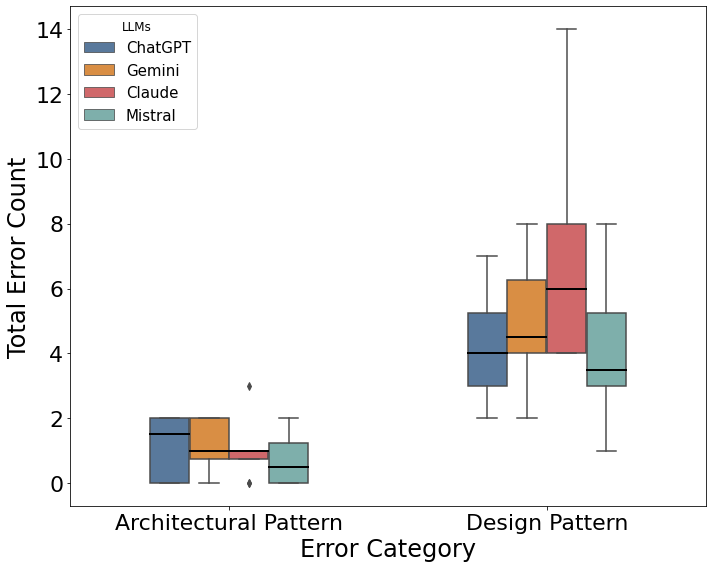

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'new_ARCH_DESIGN_analysis.xlsx'
excel_data = pd.ExcelFile(file_path)

# Prepare a combined DataFrame for plotting
combined_data = pd.DataFrame()

# Loop through each sheet and add the data to the combined DataFrame
for sheet in ['ChatGPT', 'Gemini', 'Claude', 'Mistral']:
    df = excel_data.parse(sheet)
    # Adding a column to indicate the sheet name (source) for each row
    df['Source'] = sheet
    combined_data = pd.concat([combined_data, df[['Architectural Pattern', 'Design Pattern', 'Source']]])

# Melt the combined data for easier box plotting
melted_data = pd.melt(combined_data, id_vars='Source', value_vars=['Architectural Pattern', 'Design Pattern'],
                      var_name='Metric', value_name='Value')

# Define custom color mapping for each source
color_palette = {
    'ChatGPT': '#4E79A7',
    'Gemini': '#F28E2B',
    'Claude': '#E15759',
    'Mistral': '#76B7B2'
}



# Plotting with custom colors, thinner boxes, and increased intra-group spacing
plt.figure(figsize=(10, 8))
sns.boxplot(data=melted_data, x='Metric', y='Value', hue='Source',  width=0.5, dodge='True',
            palette=color_palette, medianprops={"color": "black", "linewidth": 2})
#plt.title("Combined Box Plot for 'Class' and 'Relation' Across All Sources with Incresed Intra-group Spacing")
plt.ylabel("Total Error Count", fontsize=24)
plt.xlabel("Error Category", fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(title="LLMs", fontsize = 15, title_fontsize=12, loc='upper left')

#plt.show()

plt.tight_layout()

output_file_path = 'ARCH_DESIGN_box_plots_combined_1.png'
plt.savefig(output_file_path, format='png')

plt.show()
